# Perhitungan Manual

## Persiapan Data

### Import Library yang Diperlukan

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f, t

### Membaca Data

In [3]:
# Membaca data dari file CSV
data = pd.read_csv('Data/data liver.csv')

### Menentukan Peubah yang Digunakan

In [6]:
y = data['Y']
x0 = np.ones(len(data))
x1 = data['X1']
x2 = data['X2']
x4 = data['X4']

# Membuat DataFrame X
X = pd.DataFrame(data={'X0': x0, 'X1': x1, 'X2': x2, 'X4': x4})
print(X.head())

    X0     X1     X2     X4
0  1.0  16.36   8.90   6.02
1  1.0  26.68  21.22  12.07
2  1.0  12.49  16.62   8.88
3  1.0   8.45  22.86   7.46
4  1.0  10.19  14.23   2.06


In [7]:
data_fix = pd.DataFrame({'Y': y, 'X1': x1, 'X2': x2, 'X4': x4})
print(data_fix.head())

        Y     X1     X2     X4
0  158.76  16.36   8.90   6.02
1  197.19  26.68  21.22  12.07
2  144.73  12.49  16.62   8.88
3  140.06   8.45  22.86   7.46
4  129.71  10.19  14.23   2.06


## Eksplorasi Data

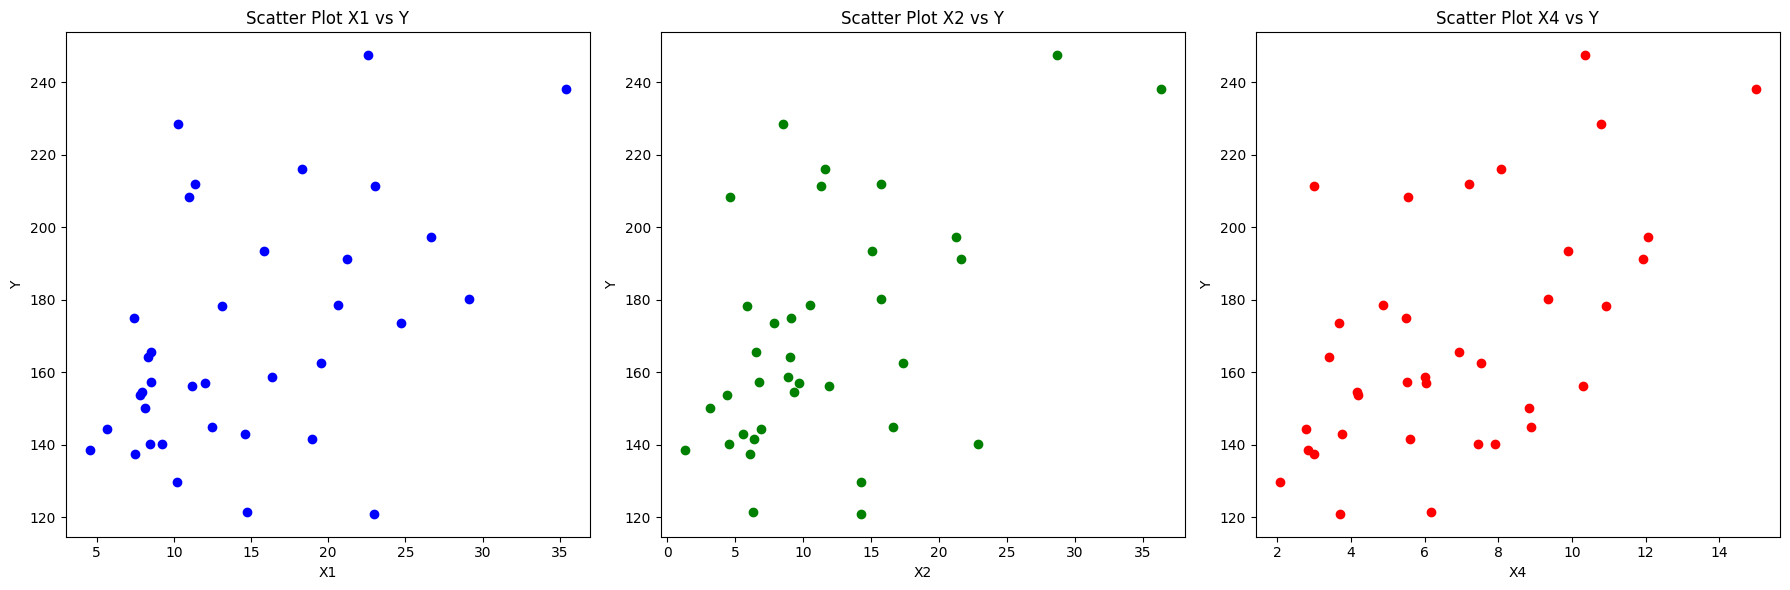

In [8]:
# Membuat subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot untuk X1 vs Y
axs[0].scatter(x1, y, color='blue')
axs[0].set_title('Scatter Plot X1 vs Y')
axs[0].set_xlabel('X1')
axs[0].set_ylabel('Y')
axs[0].grid(False)

# Scatter plot untuk X2 vs Y
axs[1].scatter(x2, y, color='green')
axs[1].set_title('Scatter Plot X2 vs Y')
axs[1].set_xlabel('X2')
axs[1].set_ylabel('Y')
axs[1].grid(False)

# Scatter plot untuk X4 vs Y
axs[2].scatter(x4, y, color='red')
axs[2].set_title('Scatter Plot X4 vs Y')
axs[2].set_xlabel('X4')
axs[2].set_ylabel('Y')
axs[2].grid(False)

plt.tight_layout()
plt.show()

Ketiga plot eksplorasi memberikan gambaran pada kecenderungan korelasi antar peubah Y dengan masing-masing peubah X (X1, X2, dan X4) berupa tren positif diikuti dengan keragaman yang cukup besar.

## Pembentukan model (Perhitungan matriks manual)

### Parameter Regresi

$$
b_{(k+1)\times1}=(X'X)_{(k+1)\times(k+1)}^{-1}X'_{(k+1)\times{n}}y_{(n\times1)}
$$

In [65]:
# Membuat matriks y
y = y.reshape(-1, 1)
# Membuat matriks X
X = np.column_stack((x0, x1, x2, x4))
# Menghitung koefisien regresi menggunakan metode least squares
b = np.round(np.linalg.inv(X.T @ X) @ X.T @ y,4)

In [33]:
# Mengambil koefisien b0, b1, b2, dan b4
b0 = b[0, 0]
b1 = b[1, 0]
b2 = b[2, 0]
b4 = b[3, 0]

# Mencetak hasil
print(f"b0: {b0}")
print(f"b1: {b1}")
print(f"b2: {b2}")
print(f"b4: {b4}")

b0: 122.1006
b1: 0.9242
b2: 0.618
b4: 3.9523


### Koefisien determinasi dan penyesuaiannya

$$
\hat{\sigma}^2=\frac{SSR_{esidual}}{n-p}=\frac{y'y-\hat{\beta}x'y}{n-p}
$$

In [39]:
n = len(y) # Jumlah observasi
p = X.shape[1] # Jumlah prediktor

# Koefisien regresi dengan metode OLS
sigma_kuadrat = (y.T @ y - b.T @ X.T @ y) / (n - p) # Menghitung varians residual (sigma_kuadrat)
Res_se = np.round(np.sqrt(sigma_kuadrat),3) # Menghitung standar error residual (Res_se)
print(f"Res_se: {Res_se[0, 0]}")

Res_se: 26.966


`Standar error residual (Res_se)` sebesar **26.966** menunjukkan bahwa, secara rata-rata, prediksi model menyimpang sekitar **26.966** unit dari nilai aktual 
$y$

In [66]:
# Degree of freedom (Derajat Bebas)
df = n - p
df

32

In [41]:
# Menghitung nilai prediksi y_duga
y_duga = b0 + b1 * x1 + b2 * x2 + b4 * x4
# Membuat DataFrame Y dengan kolom y dan y_duga
Y = pd.DataFrame({'y': y.flatten(), 'y_duga': y_duga})

print(Y.head())

        y      y_duga
0  158.76  166.513558
1  197.19  207.576477
2  144.73  179.011442
3  140.06  173.521728
4  129.71  148.454076


In [46]:
# Menghitung R-squared
R_squared = np.round((np.corrcoef(y.flatten(), y_duga)[0, 1]) ** 2, 4)
print(f"R_squared: {R_squared}")

R_squared: 0.386


$R^2$ mengukur proporsi variasi dalam variabel dependen $y$ yang dapat dijelaskan oleh variabel independen dalam model. Nilai $R^2$ sebesar **0.386** menunjukkan bahwa:

- Sekitar **38.6%** dari variasi dalam $y$ dapat dijelaskan oleh model regresi.
- Sisanya, **61.4%** dari variasi dalam $y$ tidak dijelaskan oleh model, yang mungkin disebabkan oleh faktor-faktor lain yang tidak termasuk dalam model.

Ini menunjukkan bahwa model memiliki **kecocokan yang cukup terbatas** dengan data, karena kurang dari separuh variasi dalam $y$ yang dapat dijelaskan oleh variabel independen.

In [47]:
R_squared_adj = np.round(1-((1-R_squared)*(n-1)/(n-p)), 4)
print(f"R_squared_adj: {R_squared_adj}")

R_squared_adj: 0.3284


$R^2_{\text{adj}}$ (R-squared adjusted) adalah versi yang disesuaikan dari $R^2$ yang memperhitungkan jumlah variabel independen dalam model. Nilai $R^2_{\text{adj}}$ sebesar **0.3284** menunjukkan bahwa:

- Sekitar **32.84%** dari variasi dalam variabel dependen $y$ dapat dijelaskan oleh variabel independen dalam model, setelah disesuaikan dengan jumlah prediktor.
- Nilai ini lebih rendah daripada $R^2$ biasa karena $R^2_{\text{adj}}$ memberikan penalti untuk penambahan variabel independen yang tidak signifikan.

Ini menunjukkan bahwa model memiliki **kecocokan yang terbatas** dengan data, dan penambahan variabel independen mungkin tidak memberikan kontribusi yang signifikan dalam menjelaskan variasi $y$.

### Uji F dan Std. Error parameter regresi

In [48]:
galat = y.flatten() - y_duga
KTReg = sum((y_duga - np.mean(y))**2) / (p - 1) # Menghitung jumlah kuadrat regresi (KTReg)
KTG = sum(galat**2) / (n - p) # Menghitung jumlah kuadrat galat (KTG)
Fhit = KTReg / KTG # Menghitung nilai F-statistic (Fhit)

print(f"KTReg: {KTReg}")
print(f"KTG: {KTG}")
print(f"Fhit: {np.round(Fhit, 0)}")

KTReg: 4876.200252652271
KTG: 727.147979103338
Fhit: 7.0


In [49]:
dbreg = p - 1; print(f"dbr: {dbreg}") # Derajat bebas regresi
dbg = n - p; print(f"dbg: {dbg}") # Derajat bebas galat

dbr: 3
dbg: 32


In [53]:
# p-value untuk uji F
Fhit = (np.sum((b.flatten() - np.mean(y.flatten()))**2) / dbreg) / (np.sum(galat**2) / dbg)
p_value = 1 - f.cdf(Fhit, dbreg, dbg)
print(f"p-value: {p_value}")

p-value: 6.538636299069367e-11


In [54]:
# Standar error koefisien regresi
se_b = np.sqrt(sigma_kuadrat[0, 0] * np.linalg.inv(X.T @ X).diagonal())
print(f"Standar error koefisien regresi: {se_b}")

Standar error koefisien regresi: [11.99863569  0.81268094  0.90553271  1.81195008]


In [55]:
# Mengambil standar error untuk b0, b1, b2, dan b4
se_b0 = se_b[0]
se_b1 = se_b[1]
se_b2 = se_b[2]
se_b4 = se_b[3]

# Mencetak hasil
print(f"se_b0: {round(se_b0, 4)}")
print(f"se_b1: {round(se_b1, 4)}")
print(f"se_b2: {round(se_b2, 4)}")
print(f"se_b4: {round(se_b4, 4)}")

se_b0: 11.9986
se_b1: 0.8127
se_b2: 0.9055
se_b4: 1.812


### Signifikansi Parameter (nilai-t)

In [56]:
# Menghitung t-value
t_b0 = b0 / se_b0
t_b1 = b1 / se_b1
t_b2 = b2 / se_b2
t_b4 = b4 / se_b4

# Menampilkan t-value
print(f"t_b0: {round(t_b0, 2)}")
print(f"t_b1: {round(t_b1, 2)}")
print(f"t_b2: {round(t_b2, 2)}")
print(f"t_b4: {round(t_b4, 2)}")

t_b0: 10.18
t_b1: 1.14
t_b2: 0.68
t_b4: 2.18


In [61]:
# Menghitung p-value
p_b0 = 2 * t.sf(abs(t_b0), df)
p_b1 = 2 * t.sf(abs(t_b1), df)
p_b2 = 2 * t.sf(abs(t_b2), df)
p_b4 = 2 * t.sf(abs(t_b4), df)

# Menampilkan p-value
print(f"p_b0: {p_b0}")
print(f"p_b1: {p_b1}")
print(f"p_b2: {p_b2}")
print(f"p_b4: {p_b4}")

p_b0: 1.476112973002964e-11
p_b1: 0.2638888990971348
p_b2: 0.4998519877911728
p_b4: 0.03662599377509423


Ringkasan Hasil Uji Hipotesis Koefisien Regresi

| Koefisien | p-value | Keputusan       | Kesimpulan                                   |
|-----------|---------|-----------------|----------------------------------------------|
| $b_0$ | $1.476 \times 10^{-11}$   | Tolak $H_0$   | Intercept signifikan.                        |
| $b_1$ | $0.264$   | Tolak $H_0$   | Variabel $X_1$ signifikan.               |
| $b_2$ | $0.500$   | Gagal tolak $H_0$ | Variabel $X_2$ tidak signifikan.         |
| $b_4$ | $0.037$   | Tolak $H_0$   | Variabel $X_4$ signifikan.               |

### Selang Kepercayaan $(1-\alpha)/100\%$

In [64]:
# Menghitung t-value untuk interval kepercayaan 95%
t_value = t.ppf(0.975, df= n - p)

# Menghitung batas bawah dan batas atas untuk interval kepercayaan
BB_b0 = b0 - t_value * se_b0
BA_b0 = b0 + t_value * se_b0

BB_b1 = b1 - t_value * se_b1
BA_b1 = b1 + t_value * se_b1

BB_b2 = b2 - t_value * se_b2
BA_b2 = b2 + t_value * se_b2

BB_b4 = b4 - t_value * se_b4
BA_b4 = b4 + t_value * se_b4

# Membuat matriks batas bawah dan batas atas
Batas_Bawah = np.array([round(BB_b0, 6), round(BB_b1, 6), round(BB_b2, 6), round(BB_b4, 6)])
Batas_Atas = np.array([round(BA_b0, 6), round(BA_b1, 6), round(BA_b2, 6), round(BA_b4, 6)])
Fit = np.array([round(b0, 6), round(b1, 6), round(b2, 6), round(b4, 6)])

# Menggabungkan batas bawah dan batas atas menjadi DataFrame
Selang_Kepercayaan = pd.DataFrame({
    "Batas bawah Selang (2.5%)": Batas_Bawah,
    "Fit": Fit,
    "Batas atas Selang (97.5%)": Batas_Atas
}, index=["Intersep", "b1", "b2", "b4"])

# Menampilkan hasil
print(Selang_Kepercayaan)

          Batas bawah Selang (2.5%)       Fit  Batas atas Selang (97.5%)
Intersep                  97.660179  122.1006                 146.541021
b1                        -0.731177    0.9242                   2.579577
b2                        -1.226510    0.6180                   2.462510
b4                         0.261478    3.9523                   7.643122


# Pembentukan model (library `statsmodels` & fungsi `ols`)

Dalam penggunaan library `statsmodels` dan fungsi `ols()`, kita akan memperoleh secara langsung nilai-nilai pada pemodelan regresi dari data yang kita miliki. Dengan menggunakan fungsi `summary()`, `anova_lm()`, dan `conf_int()` dari model yang terbentuk maka dapat diperoleh **nilai parameter**, **signifikansi**, **standar eror**, **koefisien determinasi**, serta **selang kepercayaan**.

## Persiapan Data

### Import Library yang Diperlukan

In [67]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Membaca Data

In [68]:
# Membaca data dari file CSV
data = pd.read_csv('Data/data liver.csv')

### Menentukan Peubah yang Digunakan

In [69]:
y = data['Y']
x1 = data['X1']
x2 = data['X2']
x4 = data['X4']

dt = pd.DataFrame({'Y': y, 'X1': x1, 'X2': x2, 'X4': x4})
print(dt.head())

        Y     X1     X2     X4
0  158.76  16.36   8.90   6.02
1  197.19  26.68  21.22  12.07
2  144.73  12.49  16.62   8.88
3  140.06   8.45  22.86   7.46
4  129.71  10.19  14.23   2.06


### Melakukan Regresi Linear

In [70]:
model = ols('y ~ x1 + x2 + x4', data = dt).fit()
# Menampilkan ringkasan model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     6.706
Date:                Wed, 19 Feb 2025   Prob (F-statistic):            0.00122
Time:                        00:32:15   Log-Likelihood:                -167.57
No. Observations:                  36   AIC:                             343.1
Df Residuals:                      32   BIC:                             349.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    122.1006     11.998     10.177      0.0

### Melakukan Uji ANOVA

In [ ]:
anova_results = sm.stats.anova_lm(model, typ = 2)
print(anova_results)

                sum_sq    df         F    PR(>F)
x1          940.528218   1.0  1.293448  0.263858
x2          338.646392   1.0  0.465719  0.499874
x4         3459.895632   1.0  4.758173  0.036619
Residual  23268.735327  32.0       NaN       NaN


### Menampilkan Interval Kepercayaan

In [72]:
conf_int = model.conf_int()
print(conf_int)

                   0           1
Intercept  97.660912  146.540358
x1         -0.731095    2.579564
x2         -1.226507    2.462407
x4          0.261620    7.643053


# Perbandingan manual (matriks) dan fungsi `ols()`

In [74]:
# Mengambil koefisien dari model
koef = model.params.values

# Menghitung koefisien regresi secara manual
X = sm.add_constant(dt[['X1', 'X2', 'X4']])  # Menambahkan intercept
b = np.linalg.inv(X.T @ X) @ X.T @ dt['Y']  # Menghitung koefisien regresi

# Menggabungkan koefisien ke dalam DataFrame
penduga = pd.DataFrame({'matriks': b, 'fungsi ols': koef})
penduga.index = ['intersep', 'b1', 'b2', 'b4']

# Menampilkan hasil
print(penduga)

             matriks  fungsi ols
intersep  122.100635  122.100635
b1          0.924235    0.924235
b2          0.617950    0.617950
b4          3.952337    3.952337


Berdasar perbandingan ini diperoleh hasil yang sama yang artinya penggunaan matriks secara manual sudah tepat dalam memodelkan regresi linear berganda bergitu pula sebaliknya.

# Tambahan: Perbandingan 2 model

In [75]:
# Model 1: y ~ x1 + x2
reg1 = ols('y ~ x1 + x2 + x4', data = dt).fit()
r_sq1 = reg1.rsquared
adj_r_sq1 = reg1.rsquared_adj
se1 = reg1.scale ** 0.5  # Standar error dari residual

# Model 2: y ~ x1 + x2 tanpa intercept
reg2 = ols('y ~ x1 + x2 + x4 - 1', data = dt).fit()
r_sq2 = reg2.rsquared
adj_r_sq2 = reg2.rsquared_adj
se2 = reg2.scale ** 0.5  # Standar error dari residual

# Membandingkan kebaikan model
model_comparison = np.array([[r_sq1, r_sq2],
                              [adj_r_sq1, adj_r_sq2],
                              [se1, se2]])

# Membuat DataFrame untuk tabel
tabel = pd.DataFrame(model_comparison, 
                     columns=["Model 1", "Model 2"],
                     index=["R-Square", "Adj R-Square", "Standar Error Sisaan"])

# Menampilkan tabel
print(tabel)

                        Model 1    Model 2
R-Square               0.386006   0.908300
Adj R-Square           0.328444   0.899963
Standar Error Sisaan  26.965682  54.654015


1. **Model 2** memiliki **R-Square** dan **Adjusted R-Square** yang lebih tinggi, menunjukkan bahwa model ini menjelaskan lebih banyak variasi dalam $y$. Namun, ini mungkin karena model diestimasi **tanpa intercept**, yang dapat membuat R-Square menjadi tidak langsung dapat dibandingkan.
2. **Model 1** memiliki **Standar Error Sisaan** yang lebih kecil, menunjukkan bahwa model ini memiliki kesalahan prediksi yang lebih rendah.